#**Final Project:**
Names: Esmeralda, Steven, Divya
##**Sypply Chain Data**
https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis?resource=download
##**Goal**
To create a model that can accuratly predict whether or not a shipment will arive late or not.


# New section

#**Importing Packages and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Uncomment your drive location for the dataset

#df_Steven = pd.read_csv('/content/drive/My Drive/Machine_Learning_Notebooks/DataCoSupplyChainDataset.csv', encoding='latin1')
#df = df_Steven
#df_Divya = pd.read_csv('/content/drive/MyDrive/DataCoSupplyChainDataset.csv', encoding='latin1')
#df_Esmeralda = pd.read_csv('/content/drive/My Drive/USF 8) Spring 2025 Semester/Foundations of Machine Learning: CS 463 - 01 (SPRING 2025)/ML Final Project', encoding='latin1')


#Assign df to your df_name

#df = df_Divya

In [ ]:
#FOR ESMERALDA TO BE ABLE TO RUN DATA!!!!!!
#mount Google Drive
from google.colab import drive
import os

#Mount Google Drive
drive.mount('/content/drive', force_remount = True)

#Specify the folder you want to access
project_folder = "/content/drive/My Drive/USF 8) Spring 2025 Semester/Foundations of Machine Learning: CS 463 - 01 (SPRING 2025)/ML Final Project"

file_path = os.path.join(project_folder, "DataCoSupplyChainDataset.csv")

df = pd.read_csv(file_path, encoding='latin-1')

Mounted at /content/drive


#**EDA**

In [ ]:
#Display the top 5 rows
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.shape

(180519, 53)

In [ ]:
#Dataframe dimensions and NA value investigation, variable data types, and list of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
#Create df_cleaned without columns 7,8,11,12,13,14,15,16,27,29,30,33,44,45,46,47,48
##This decision was made based on our logical analysis of our prompt and target variable.

columns_to_drop = [7, 8, 11, 12, 13, 14, 15, 16, 27, 29, 30, 33, 44, 45, 46, 47, 48]
df_cleaned = df.drop(df.columns[columns_to_drop], axis=1)

#Creating a new column 'Delay' which is the actual shipping time - expected shipping time
df_cleaned['Delay'] = df_cleaned['Days for shipping (real)'] - df_cleaned['Days for shipment (scheduled)']

#Dropping more columns after team discussion
df_cleaned.drop(df_cleaned.columns[[1,2,3,5,10,11,16,28,33]], inplace=True, axis = 1)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        180519 non-null  object 
 1   Sales per customer          180519 non-null  float64
 2   Late_delivery_risk          180519 non-null  int64  
 3   Customer City               180519 non-null  object 
 4   Customer Country            180519 non-null  object 
 5   Customer State              180519 non-null  object 
 6   Department Id               180519 non-null  int64  
 7   Department Name             180519 non-null  object 
 8   Latitude                    180519 non-null  float64
 9   Longitude                   180519 non-null  float64
 10  Order City                  180519 non-null  object 
 11  Order Country               180519 non-null  object 
 12  order date (DateOrders)     180519 non-null  object 
 13  Order Item Dis

In [ ]:
#Creating target variable - Late Arrival
  ## 1 = yes, the item arrived late to the customer
  ## 0 = no, the item arrived on time or beforetime
df_cleaned['Late Arrival'] = df_cleaned['Delay'].apply(lambda x: 1 if x > 0 else 0)

df_cleaned.head()

,Type,Sales per customer,Late_delivery_risk,Customer City,Customer Country,Customer State,Department Id,Department Name,Latitude,Longitude,...,Order Item Total,Order Profit Per Order,Order State,Order Status,Order Zipcode,Product Price,shipping date (DateOrders),Shipping Mode,Delay,Late Arrival
0,DEBIT,314.640015,0,Caguas,Puerto Rico,PR,2,Fitness,18.251453,-66.037056,...,314.640015,91.250000,Java Occidental,COMPLETE,NaN,327.75,2/3/2018 22:56,Standard Class,-1,0
1,TRANSFER,311.359985,1,Caguas,Puerto Rico,PR,2,Fitness,18.279451,-66.037064,...,311.359985,-249.089996,Rajastán,PENDING,NaN,327.75,1/18/2018 12:27,Standard Class,1,1
2,CASH,309.720001,0,San Jose,EE. UU.,CA,2,Fitness,37.292233,-121.881279,...,309.720001,-247.779999,Rajastán,CLOSED,NaN,327.75,1/17/2018 12:06,Standard Class,0,0
3,DEBIT,304.809998,0,Los Angeles,EE. UU.,CA,2,Fitness,34.125946,-118.291016,...,304.809998,22.860001,Queensland,COMPLETE,NaN,327.75,1/16/2018 11:45,Standard Class,-1,0
4,PAYMENT,298.250000,0,Caguas,Puerto Rico,PR,2,Fitness,18.253769,-66.037048,...,298.250000,134.210007,Queensland,PENDING_PAYMENT,NaN,327.75,1/15/2018 11:24,Standard Class,-2,0


In [ ]:
#Basic statistics on numeric variables
print(df_cleaned.describe())

       Sales per customer  Late_delivery_risk  Department Id       Latitude  \
count       180519.000000       180519.000000  180519.000000  180519.000000   
mean           183.107609            0.548291       5.443460      29.719955   
std            120.043670            0.497664       1.629246       9.813646   
min              7.490000            0.000000       2.000000     -33.937553   
25%            104.379997            0.000000       4.000000      18.265432   
50%            163.990005            1.000000       5.000000      33.144863   
75%            247.399994            1.000000       7.000000      39.279617   
max           1939.989990            1.000000      12.000000      48.781933   

           Longitude  Order Item Discount  Order Item Discount Rate  \
count  180519.000000        180519.000000             180519.000000   
mean      -84.915675            20.664741                  0.101668   
std        21.433241            21.800901                  0.070415   
min 

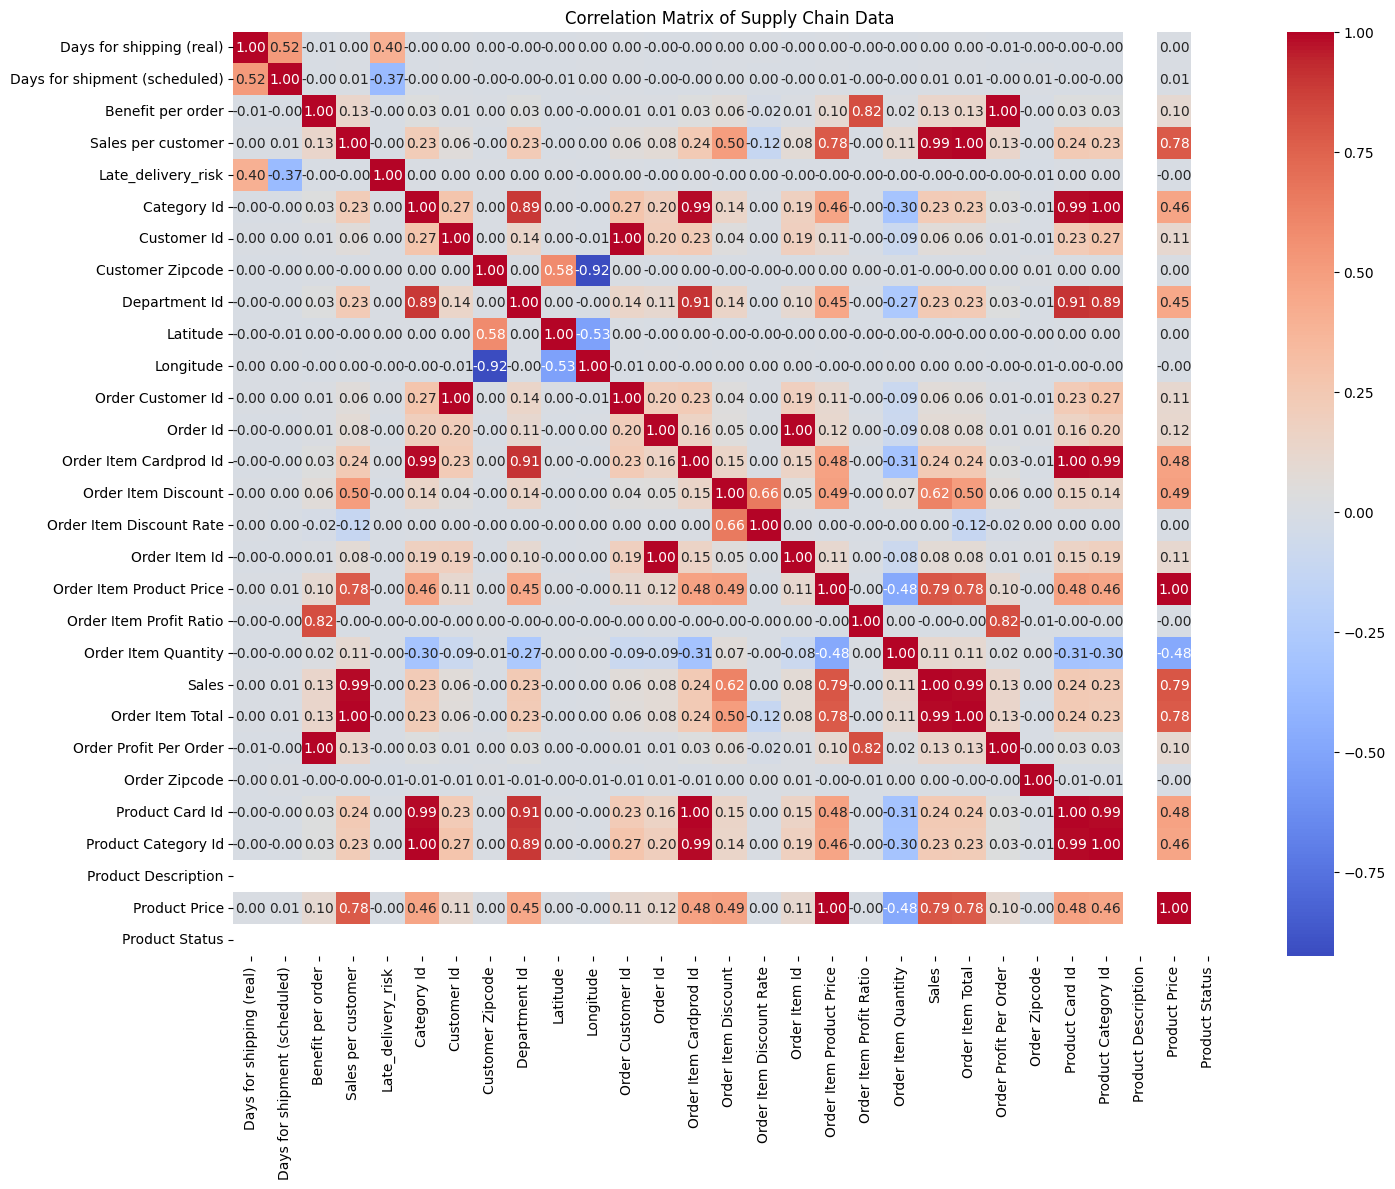

In [ ]:
#Understanding the correlations in numeric varables
# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns
num_df = df[num_cols]

# Calc Pearson correlation coefficient between all paris of columns in df
correlation_matrix = num_df.corr()

# Correlation heatmap among features
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Supply Chain Data")
plt.show()

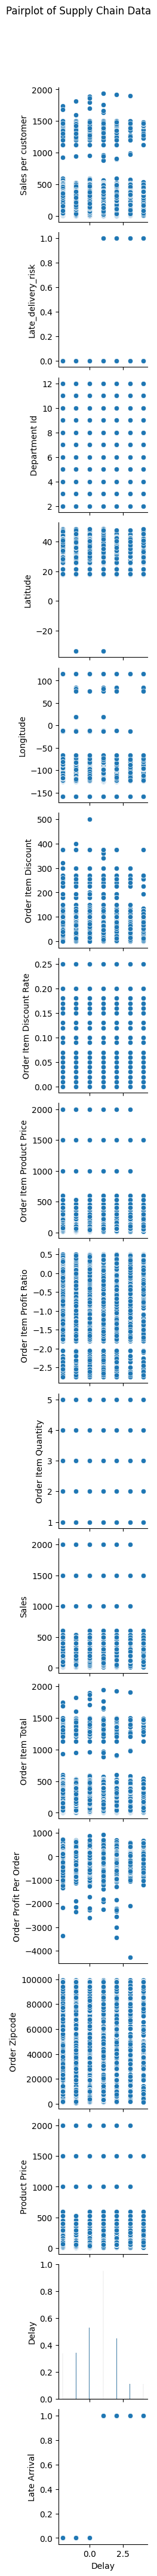

In [ ]:
# Select only numeric columns for pairplot
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns

# Exclude 'delay' column from the list of numeric columns to plot against it
numeric_cols_to_plot = [col for col in numeric_cols if col != 'delay']

# Create pairplots
sns.pairplot(data=df_cleaned, y_vars=numeric_cols_to_plot, x_vars=['Delay'], kind='scatter')
plt.suptitle('Pairplot of Supply Chain Data', y=1.02)
plt.show()


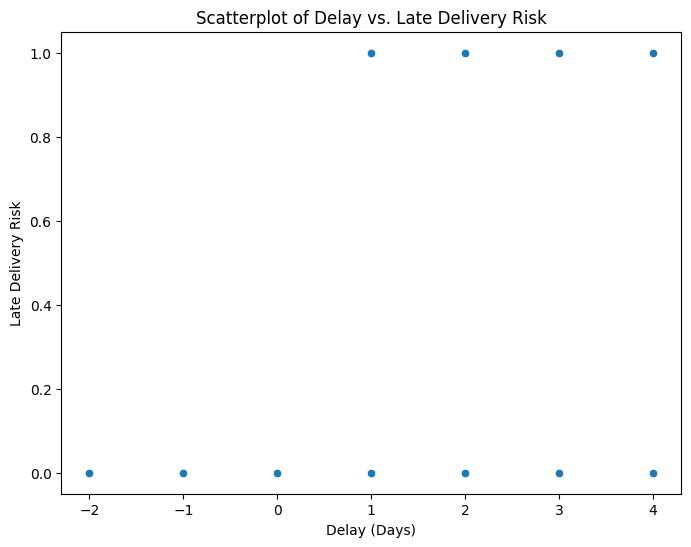

In [ ]:
# Visualizing a scatterplot delay vs late delivery risk

# Assuming 'df_cleaned' DataFrame from the provided code is available.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Delay', y='Late_delivery_risk', data=df_cleaned)
plt.title('Scatterplot of Delay vs. Late Delivery Risk')
plt.xlabel('Delay (Days)')
plt.ylabel('Late Delivery Risk')
plt.show()


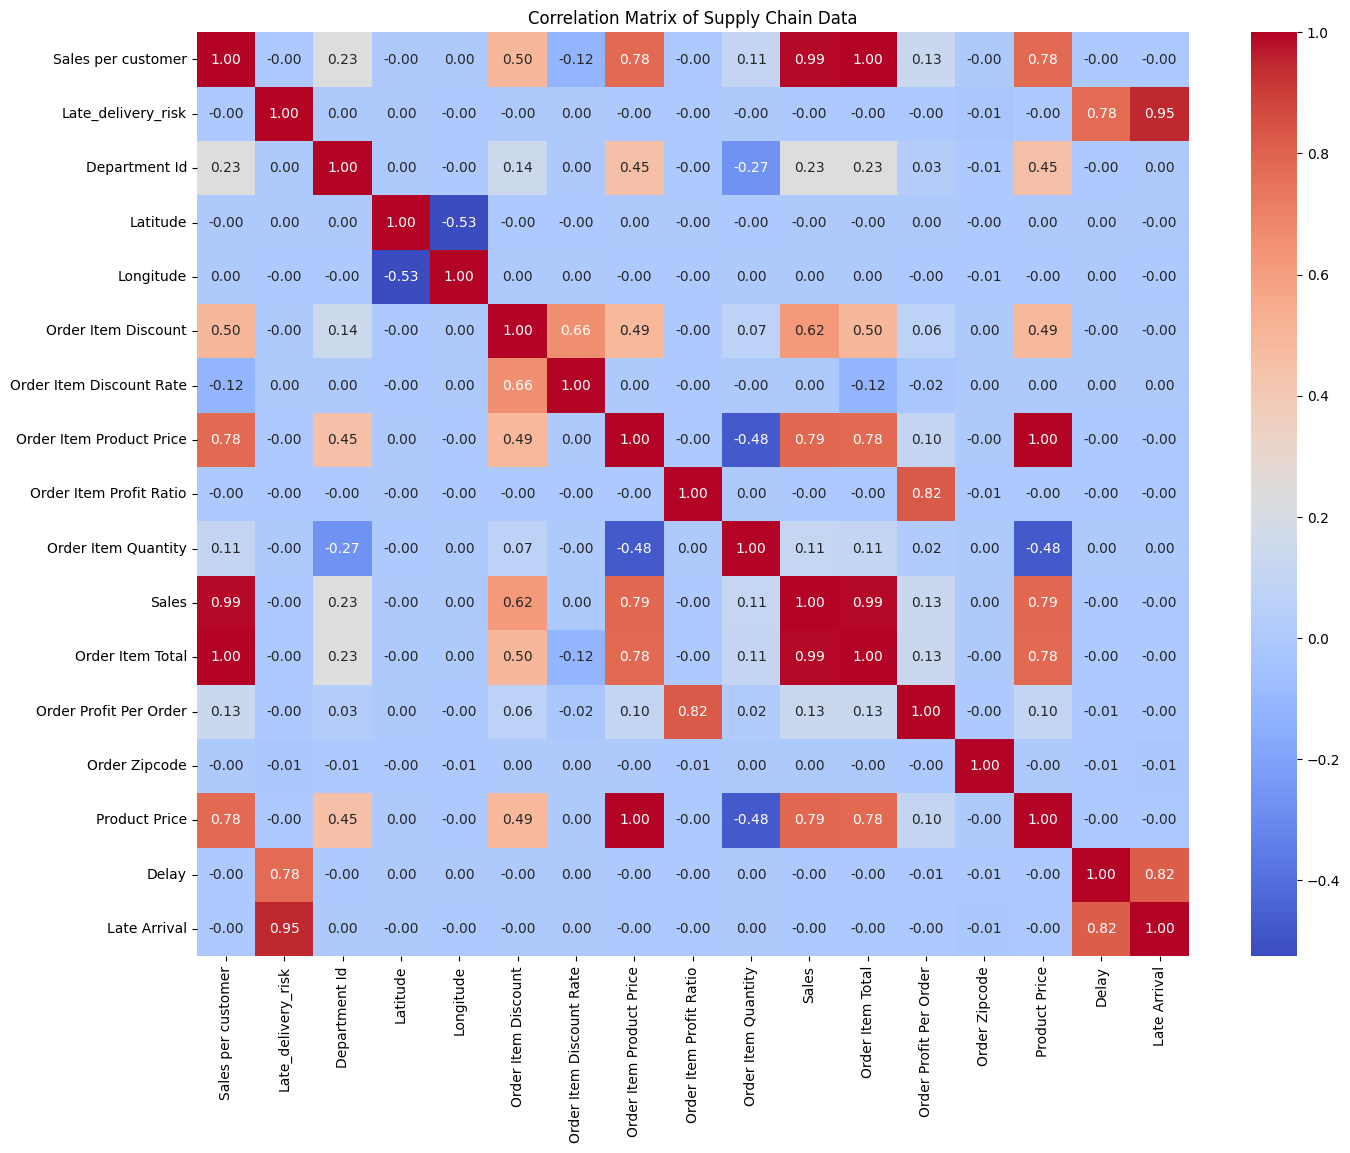

In [ ]:
#Understanding the correlations in numeric varables
# Select only numerical columns
num_cols = df_cleaned.select_dtypes(include=['number']).columns
num_df = df_cleaned[num_cols]

# Calc Pearson correlation coefficient between all paris of columns in df
correlation_matrix = num_df.corr()

# Correlation heatmap among features
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Supply Chain Data")
plt.show()

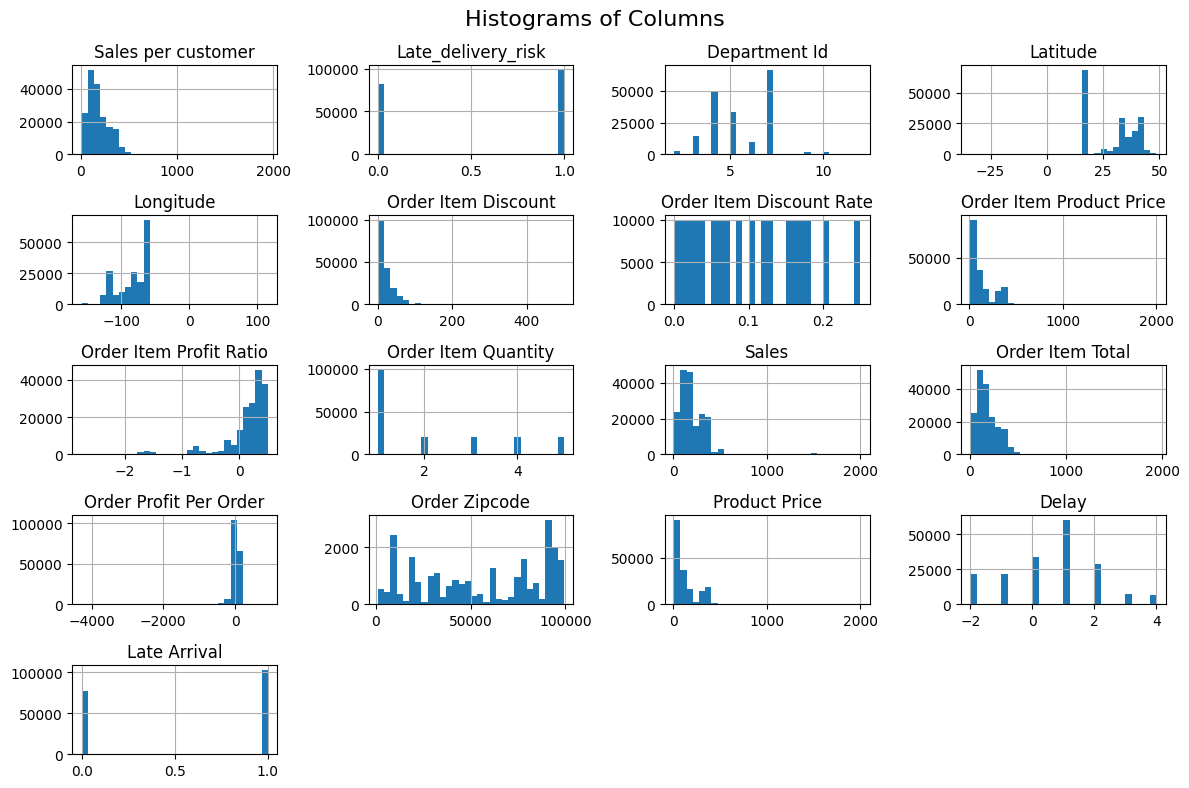

In [ ]:
#Histogram Visualization
df_cleaned.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Columns", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [ ]:
#Delete any entries whose latitiudes/Longitudes are not in the US + Purteo rico range
df_cleaned = df_cleaned[(df_cleaned['Latitude'] >= 25) & (df_cleaned['Latitude'] <= 50) & (df_cleaned['Longitude'] >= -130) & (df_cleaned['Longitude'] <= -65)]


In [ ]:
#group by delay
df_cleaned.groupby('Delay').size()


,0
Delay,
-2,13196
-1,13159
0,20744
1,37115
2,17430
3,4375
4,4283


In [ ]:
#A dataframe of everything that was delayed and not a late delivery risk
#We now have less noise in our dataframe
df_unexpected_delay = df_cleaned[(df_cleaned['Delay'] > 0) & (df_cleaned['Late_delivery_risk'] != 1)]


In [ ]:
#A Dataframe of items that were shipped on time and therefore not a Late_delivery_risk
#df_delay = df_cleaned[(df_cleaned['Late_delivery_risk'] != 1)]
#Drop insignificant numeric information
df_delay=df_cleaned.drop(columns=['Department Id','Order Zipcode'], axis = 1)

In [ ]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110302 entries, 2 to 180516
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        110302 non-null  object 
 1   Sales per customer          110302 non-null  float64
 2   Late_delivery_risk          110302 non-null  int64  
 3   Customer City               110302 non-null  object 
 4   Customer Country            110302 non-null  object 
 5   Customer State              110302 non-null  object 
 6   Department Name             110302 non-null  object 
 7   Latitude                    110302 non-null  float64
 8   Longitude                   110302 non-null  float64
 9   Order City                  110302 non-null  object 
 10  Order Country               110302 non-null  object 
 11  order date (DateOrders)     110302 non-null  object 
 12  Order Item Discount         110302 non-null  float64
 13  Order Item Discount

In [ ]:
#Finding variables that would make sense to one-hot encode
print(df_delay['Department Name'].unique())

#Encode country but on a dataset that has been cleaned of countries with late deliveries
print(df_delay['Order Country'].unique())
print(df_delay['Shipping Mode'].unique())

['Fitness' 'Footwear' 'Apparel' 'Golf' 'Outdoors' 'Fan Shop' 'Book Shop'
 'Discs Shop' 'Pet Shop' 'Technology' 'Health and Beauty ']
['India' 'Australia' 'China' 'Indonesia' 'Singapur' 'Estados Unidos'
 'Canada' 'Madagascar' 'Argelia' 'Liberia' 'Sudán' 'Costa de Marfil'
 'Zambia' 'Marruecos' 'Egipto' 'Níger' 'SudAfrica' 'Nigeria' 'Mozambique'
 'Tanzania' 'Somalia' 'Ruanda' 'Turquía' 'Israel' 'Nueva Zelanda'
 'Bangladés' 'Tailandia' 'Irak' 'Arabia Saudí' 'Filipinas' 'Kazajistán'
 'Irán' 'Myanmar (Birmania)' 'Uzbekistán' 'Benín'
 'República Democrática del Congo' 'Camerún' 'Angola' 'Kenia' 'Togo'
 'Senegal' 'Francia' 'Ucrania' 'España' 'Alemania' 'Italia' 'Polonia'
 'Portugal' 'Reino Unido' 'Rumania' 'México' 'Colombia' 'Brasil'
 'República Dominicana' 'Trinidad y Tobago' 'Guatemala' 'Panamá'
 'Honduras' 'Venezuela' 'Cuba' 'El Salvador' 'Argentina' 'Afganistán'
 'Pakistán' 'Vietnam' 'Malasia' 'Ghana' 'Guinea' 'Etiopía' 'Países Bajos'
 'Rusia' 'Bélgica' 'Finlandia' 'Bulgaria' 'Austria' 'J

In [ ]:
#encode categorical variables to get information on correlations
df_delay = pd.get_dummies(df_delay, columns=['Department Name','Shipping Mode'], drop_first=True)


In [ ]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110302 entries, 2 to 180516
Data columns (total 38 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Type                                110302 non-null  object 
 1   Sales per customer                  110302 non-null  float64
 2   Late_delivery_risk                  110302 non-null  int64  
 3   Customer City                       110302 non-null  object 
 4   Customer Country                    110302 non-null  object 
 5   Customer State                      110302 non-null  object 
 6   Latitude                            110302 non-null  float64
 7   Longitude                           110302 non-null  float64
 8   Order City                          110302 non-null  object 
 9   Order Country                       110302 non-null  object 
 10  order date (DateOrders)             110302 non-null  object 
 11  Order Item Discount            

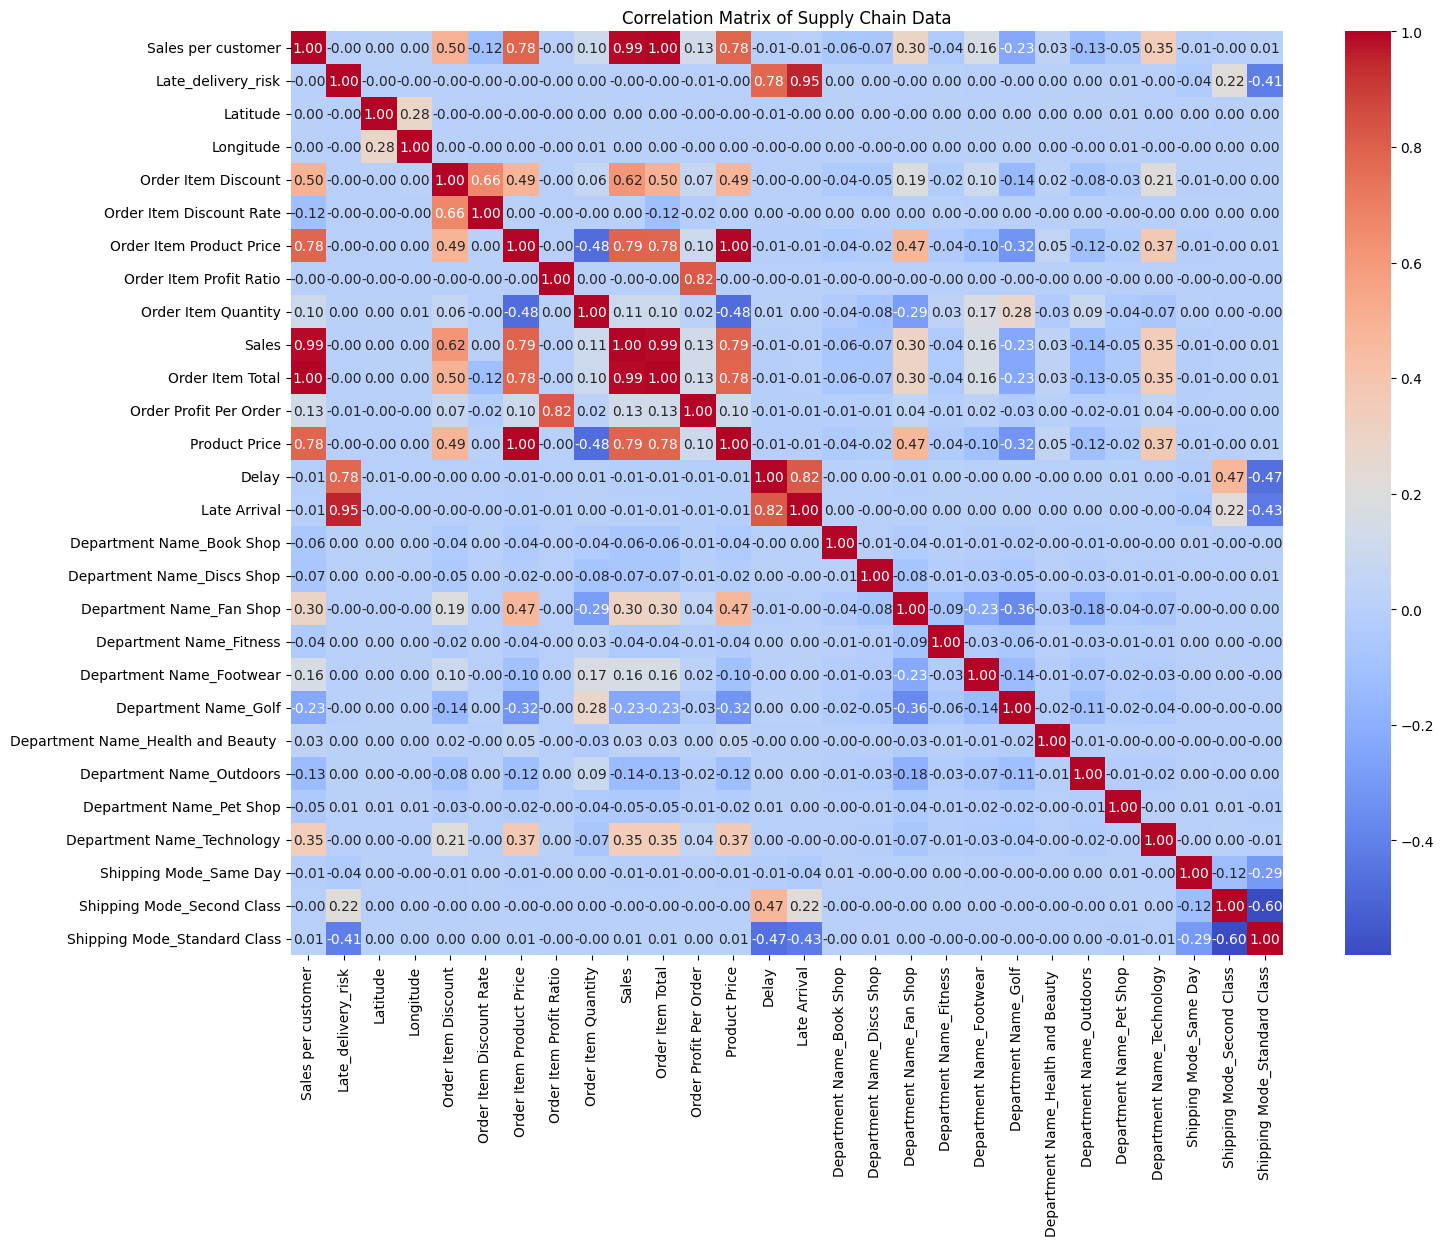

In [ ]:
# Select only numerical columns
num_cols = df_delay.select_dtypes(include=['number','boolean']).columns
num_df = df_delay[num_cols]
# Calc Pearson correlation coefficient between all paris of columns in df
correlation_matrix = num_df.corr()

# Correlation heatmap among features
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Supply Chain Data")
plt.show()

In [ ]:
df_delay.describe()

,Sales per customer,Late_delivery_risk,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Delay,Late Arrival
count,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000,110302.000000
mean,183.045399,0.548811,36.948190,-95.959911,20.631004,0.101506,141.321863,0.120814,2.124567,203.676151,183.045399,22.048522,141.321863,0.568267,0.573000
std,120.002325,0.497614,4.686874,17.968989,21.663807,0.070268,139.619452,0.467407,1.451014,132.109487,120.002325,104.364400,139.619452,1.490554,0.494645
min,7.490000,0.000000,25.105715,-125.450050,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,9.990000,-2.000000,0.000000
25%,104.370003,0.000000,33.828424,-117.330292,5.400000,0.040000,50.000000,0.080000,1.000000,119.980003,104.370003,6.980000,50.000000,0.000000,0.000000
50%,163.990005,1.000000,37.490276,-90.109657,14.000000,0.090000,59.990002,0.270000,1.000000,199.919998,163.990005,31.660000,59.990002,1.000000,1.000000
75%,247.500000,1.000000,40.727280,-80.149757,29.990000,0.160000,199.990005,0.360000,3.000000,299.950012,247.500000,64.970001,199.990005,1.000000,1.000000
max,1919.989990,1.000000,48.781933,-70.668617,400.000000,0.250000,1999.989990,0.500000,5.000000,1999.989990,1919.989990,864.000000,1999.989990,4.000000,1.000000


In [ ]:
df_unexpected_delay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2668 entries, 5 to 180309
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Type                        2668 non-null   object 
 1   Sales per customer          2668 non-null   float64
 2   Late_delivery_risk          2668 non-null   int64  
 3   Customer City               2668 non-null   object 
 4   Customer Country            2668 non-null   object 
 5   Customer State              2668 non-null   object 
 6   Department Id               2668 non-null   int64  
 7   Department Name             2668 non-null   object 
 8   Latitude                    2668 non-null   float64
 9   Longitude                   2668 non-null   float64
 10  Order City                  2668 non-null   object 
 11  Order Country               2668 non-null   object 
 12  order date (DateOrders)     2668 non-null   object 
 13  Order Item Discount         2668 non

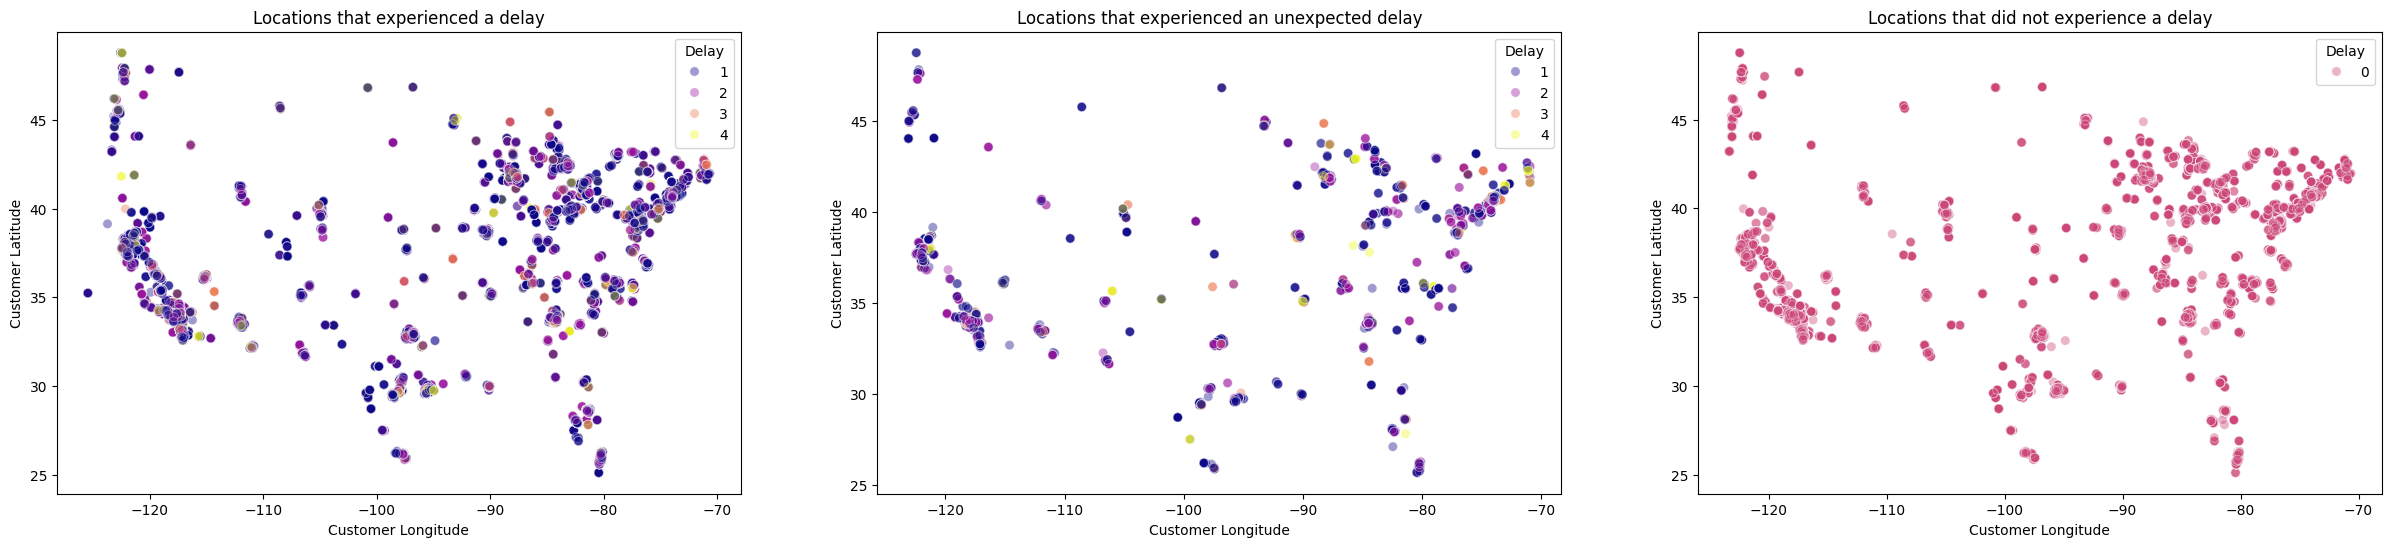

In [ ]:
#Plotting the latitude vs longitude of addresses and coloring them by 'Delay' to visualize any location specific correlations
plt.figure(figsize=(30, 6))
#Python libraries abd functions do not come to me intuitively
plt.subplot(1,3,1)
sns.scatterplot(data=df_cleaned[df_cleaned['Delay'] > 0], x='Longitude', y='Latitude', hue='Delay', palette='plasma', s=45, alpha=0.4)
plt.xlabel('Customer Longitude')
plt.ylabel('Customer Latitude')
plt.title('Locations that experienced a delay')
plt.legend(title='Delay')

plt.subplot(1,3,2)
sns.scatterplot(data=df_unexpected_delay, x='Longitude', y='Latitude', hue='Delay', palette='plasma', s=45, alpha=0.4)
plt.xlabel('Customer Longitude')
plt.ylabel('Customer Latitude')
plt.title('Locations that experienced an unexpected delay')
plt.legend(title='Delay')

plt.subplot(1,3,3)
sns.scatterplot(data=df_cleaned[df_cleaned['Delay'] == 0], x='Longitude', y='Latitude', hue='Delay', palette='plasma', s=45, alpha=0.4)
plt.xlabel('Customer Longitude')
plt.ylabel('Customer Latitude')
plt.title('Locations that did not experience a delay')
plt.legend(title='Delay')
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Customer City', 'Customer Country','Order City','Order Country','Shipping Mode'], drop_first=True)
#df = pd.get_dummies(df, columns=[])

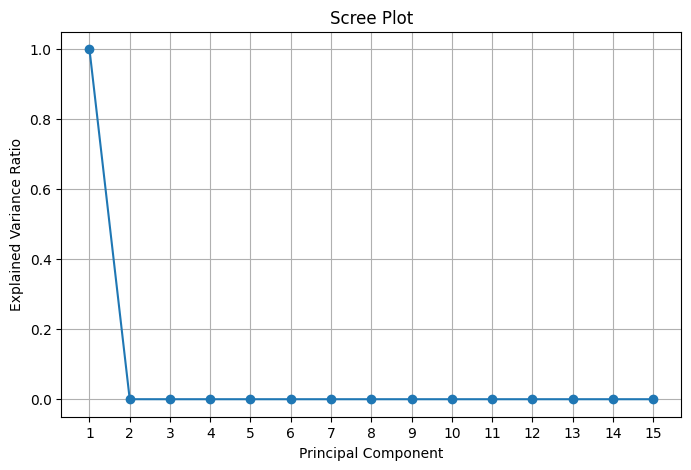

In [ ]:
#PCA analysis to see which variables we truly do need?????????
pca = PCA()
#pca fit only numeric cols
#Dropping obviously correlated variables before PCA
df_encoded.drop(columns=['Late_delivery_risk','Sales per customer'], inplace=True, axis = 1)
pca.fit(df_encoded.select_dtypes(include=np.number).dropna())

#pca.fit(df_encoded.groupby('Number'))
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

In [ ]:
pc1_variance = explained_variance[0]
pc2_variance = explained_variance[1]
#pc3_variance = explained_variance[2]
#pc4_variance = explained_variance[3]

print(f"PC1 Explained Variance: {pc1_variance:.4f}")
print(f"PC2 Explained Variance: {pc2_variance:.4f}")
#print(f"PC3 Explained Variance: {pc3_variance:.4f}")
#print(f"PC4 Explained Variance: {pc4_variance:.4f}")

PC1 Explained Variance: 0.9999
PC2 Explained Variance: 0.0000


In [ ]:
loadings_df = pd.DataFrame({
    'Feature': df_encoded.select_dtypes(include=np.number).dropna().columns,
    'PC1 Loadings': pca.components_[0],
    'PC2 Loadings': pca.components_[1],
    #'PC3 Loadings': pca.components_[2],
    #'PC4 Loadings': pca.components_[3]
})
print("\nFeature Loadings for PC1 and PC2:")
print(loadings_df)


Feature Loadings for PC1 and PC2:
                     Feature  PC1 Loadings  PC2 Loadings
0              Department Id -4.809632e-07      0.003128
1                   Latitude -5.280210e-06     -0.000169
2                  Longitude -4.238284e-06      0.000139
3        Order Item Discount  1.820592e-06      0.047604
4   Order Item Discount Rate -1.307812e-08     -0.000006
5   Order Item Product Price  1.425658e-05      0.532272
6    Order Item Profit Ratio -1.279743e-07      0.000091
7        Order Item Quantity  4.934240e-07     -0.001780
8                      Sales  3.574543e-05      0.484502
9           Order Item Total  3.392495e-05      0.436898
10    Order Profit Per Order -2.285943e-05      0.073974
11             Order Zipcode  1.000000e+00     -0.000046
12             Product Price  1.425658e-05      0.532272
13                     Delay -5.330519e-07     -0.000113
14              Late Arrival -5.655864e-08     -0.000030


##While we tried implementing PCA as seen aboave, we decided overall our PCA was a part of eda and not feature engenering for this project.

In [ ]:
# Search for the string 'XXXXX' in the entire DataFrame
mask = df.apply(lambda row: row.astype(str).str.contains("XXXXX")).any(axis=1)

# Rows where 'XXXXX' is found
matching_rows = df[mask]

print("Matching rows:")
print(matching_rows)

Matching rows:
            Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Sta

#**Feature Engenering**

In [ ]:
df_cleaned.head()

,Type,Sales per customer,Late_delivery_risk,Customer City,Customer Country,Customer State,Department Id,Department Name,Latitude,Longitude,...,Order Item Total,Order Profit Per Order,Order State,Order Status,Order Zipcode,Product Price,shipping date (DateOrders),Shipping Mode,Delay,Late Arrival
2,CASH,309.720001,0,San Jose,EE. UU.,CA,2,Fitness,37.292233,-121.881279,...,309.720001,-247.779999,Rajastán,CLOSED,NaN,327.75,1/17/2018 12:06,Standard Class,0,0
3,DEBIT,304.809998,0,Los Angeles,EE. UU.,CA,2,Fitness,34.125946,-118.291016,...,304.809998,22.860001,Queensland,COMPLETE,NaN,327.75,1/16/2018 11:45,Standard Class,-1,0
5,TRANSFER,294.980011,0,Tonawanda,EE. UU.,NY,2,Fitness,43.013969,-78.879066,...,294.980011,18.580000,Queensland,CANCELED,NaN,327.75,1/19/2018 11:03,Standard Class,2,1
7,TRANSFER,285.140015,1,Miami,EE. UU.,FL,2,Fitness,25.928869,-80.162872,...,285.140015,68.430000,Guangdong,PROCESSING,NaN,327.75,1/15/2018 10:21,First Class,1,1
9,CASH,275.309998,1,San Ramon,EE. UU.,CA,2,Fitness,37.773991,-121.966629,...,275.309998,132.149994,Guangdong,CLOSED,NaN,327.75,1/15/2018 9:39,First Class,1,1


In [ ]:
#Feature Importance with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Creating list of object variables so that I may start feature engenering them to be somthing other than object types
df_cleaned.select_dtypes(include=['object']).columns.to_list()

['Type',
 'Customer City',
 'Customer Country',
 'Customer State',
 'Department Name',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order State',
 'Order Status',
 'shipping date (DateOrders)',
 'Shipping Mode']

In [ ]:
#Viz Shipping date to understand how the data is set
df_cleaned['shipping date (DateOrders)']

,shipping date (DateOrders)
2,1/17/2018 12:06
3,1/16/2018 11:45
5,1/19/2018 11:03
7,1/15/2018 10:21
9,1/15/2018 9:39
...,...
180511,1/18/2016 6:28
180513,1/19/2016 5:04
180514,1/20/2016 3:40
180515,1/19/2016 1:34


In [ ]:
#Convert current object type to date type
df_cleaned['order date (DateOrders)'] = pd.to_datetime(df_cleaned['order date (DateOrders)'])
df_cleaned['shipping date (DateOrders)'] = pd.to_datetime(df_cleaned['shipping date (DateOrders)'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110302 entries, 2 to 180516
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Type                        110302 non-null  object        
 1   Sales per customer          110302 non-null  float64       
 2   Late_delivery_risk          110302 non-null  int64         
 3   Customer City               110302 non-null  object        
 4   Customer Country            110302 non-null  object        
 5   Customer State              110302 non-null  object        
 6   Department Id               110302 non-null  int64         
 7   Department Name             110302 non-null  object        
 8   Latitude                    110302 non-null  float64       
 9   Longitude                   110302 non-null  float64       
 10  Order City                  110302 non-null  object        
 11  Order Country               110302 non-null 

In [ ]:
# Create new columns for date and time for both order and shipping dates
df_cleaned['order_date'] = df_cleaned['order date (DateOrders)'].dt.date
df_cleaned['order_time'] = df_cleaned['order date (DateOrders)'].dt.time

df_cleaned['shipping_date'] = df_cleaned['shipping date (DateOrders)'].dt.date
df_cleaned['shipping_time'] = df_cleaned['shipping date (DateOrders)'].dt.time

df_cleaned.head()

,Type,Sales per customer,Late_delivery_risk,Customer City,Customer Country,Customer State,Department Id,Department Name,Latitude,Longitude,...,Order Zipcode,Product Price,shipping date (DateOrders),Shipping Mode,Delay,Late Arrival,order_date,order_time,shipping_date,shipping_time
2,CASH,309.720001,0,San Jose,EE. UU.,CA,2,Fitness,37.292233,-121.881279,...,NaN,327.75,2018-01-17 12:06:00,Standard Class,0,0,2018-01-13,12:06:00,2018-01-17,12:06:00
3,DEBIT,304.809998,0,Los Angeles,EE. UU.,CA,2,Fitness,34.125946,-118.291016,...,NaN,327.75,2018-01-16 11:45:00,Standard Class,-1,0,2018-01-13,11:45:00,2018-01-16,11:45:00
5,TRANSFER,294.980011,0,Tonawanda,EE. UU.,NY,2,Fitness,43.013969,-78.879066,...,NaN,327.75,2018-01-19 11:03:00,Standard Class,2,1,2018-01-13,11:03:00,2018-01-19,11:03:00
7,TRANSFER,285.140015,1,Miami,EE. UU.,FL,2,Fitness,25.928869,-80.162872,...,NaN,327.75,2018-01-15 10:21:00,First Class,1,1,2018-01-13,10:21:00,2018-01-15,10:21:00
9,CASH,275.309998,1,San Ramon,EE. UU.,CA,2,Fitness,37.773991,-121.966629,...,NaN,327.75,2018-01-15 09:39:00,First Class,1,1,2018-01-13,09:39:00,2018-01-15,09:39:00


In [ ]:
#Printing out the earliest and latest dats in the records
print(df_cleaned['order date (DateOrders)'].min())
print(df_cleaned['order date (DateOrders)'].max())
print()
print(df_cleaned['shipping date (DateOrders)'].min())
print(df_cleaned['shipping date (DateOrders)'].max())

2015-01-01 00:00:00
2018-01-31 23:38:00

2015-01-03 00:00:00
2018-02-06 18:44:00


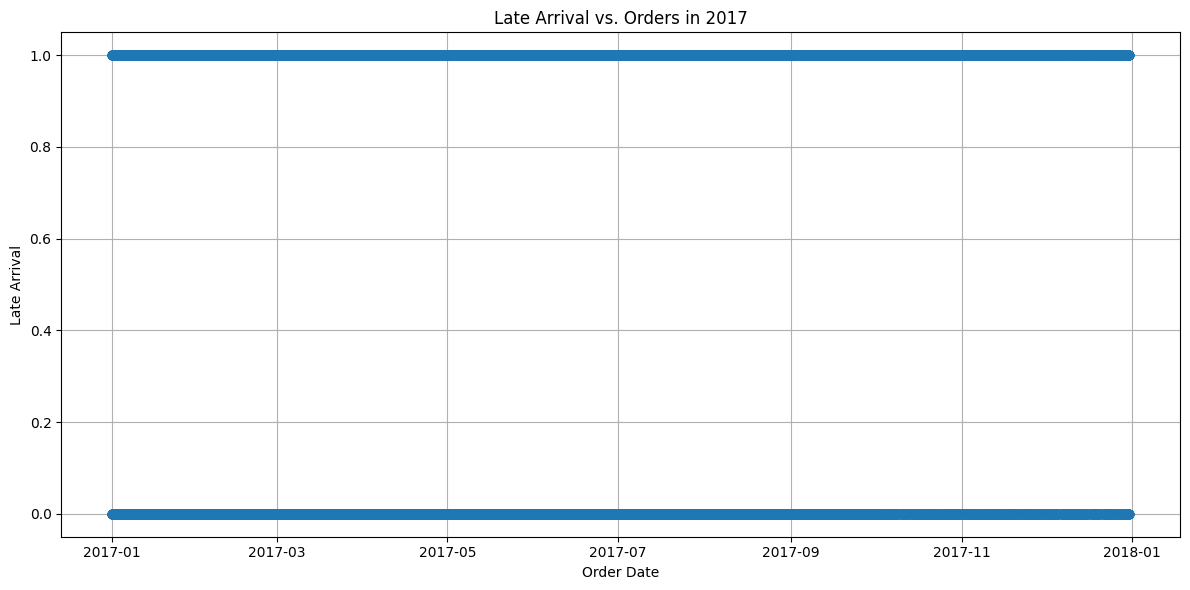

In [ ]:
#Viz of Late Arrival for Orders made in 2017
# Sample of only 2017 orders
df_cleaned_2017 = df_cleaned[df_cleaned['order date (DateOrders)'].dt.year == 2017]

# Graph
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned_2017['order_date'], df_cleaned_2017['Late Arrival'], marker='o', linestyle='', alpha=0.6)
plt.title('Late Arrival vs. Orders in 2017')
plt.xlabel('Order Date')
plt.ylabel('Late Arrival')
plt.grid(True)
plt.tight_layout()
plt.show()

##In developing the graph above we hoped to see some paterns that showsed potential seasonality that afected weather or not a shipment was late but it seems that was not the case.

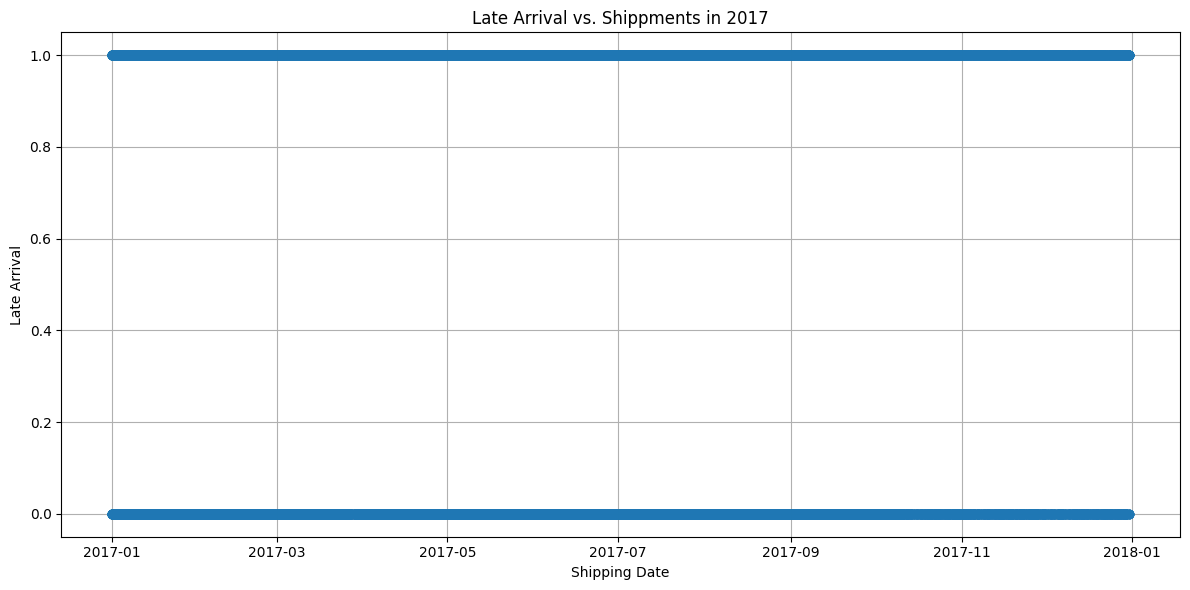

In [ ]:
#Viz of Late Arrival for Shippments made in 2017
# Sample of only 2017 Shippments
df_cleaned_2017 = df_cleaned[df_cleaned['shipping date (DateOrders)'].dt.year == 2017]

# Graph
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned_2017['shipping_date'], df_cleaned_2017['Late Arrival'], marker='o', linestyle='', alpha=0.6)
plt.title('Late Arrival vs. Shippments in 2017')
plt.xlabel('Shipping Date')
plt.ylabel('Late Arrival')
plt.grid(True)
plt.tight_layout()
plt.show()

##Visualizing only the shipping paterns in a 1 year timeline to see if there were any paterns with on-time and late shippments that I was not able to see before. As you can see here, there is not much difference visable in a year time frame.

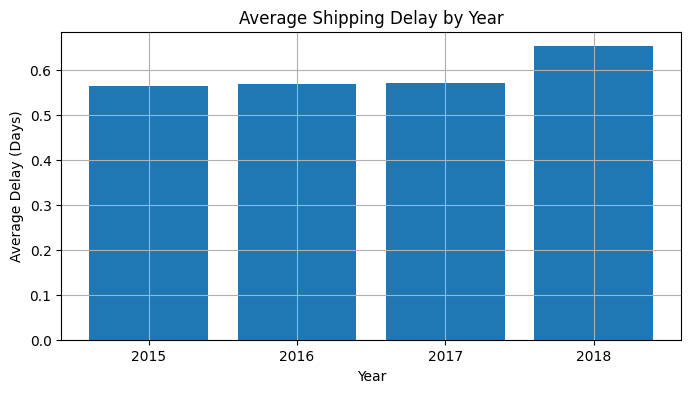

In [ ]:
#Average Delay time By Year
# Extract year from date
df_cleaned['order_year'] = df_cleaned['order date (DateOrders)'].dt.year #NEED TO MAKE SURE i DONT HAVE DUP;ICATE COLUMNS LATER!!!!!!!!!!!!!

# Group by year and calculate average delay
avg_delay_per_year = df_cleaned.groupby('order_year')['Delay'].mean().reset_index() #this last bit is to have indexes on the records of this new df

# Plot bar chart
plt.figure(figsize=(8, 4))
plt.bar(avg_delay_per_year['order_year'], avg_delay_per_year['Delay'])
plt.title('Average Shipping Delay by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay (Days)')
plt.xticks(avg_delay_per_year['order_year'])
plt.grid(True)
plt.show()

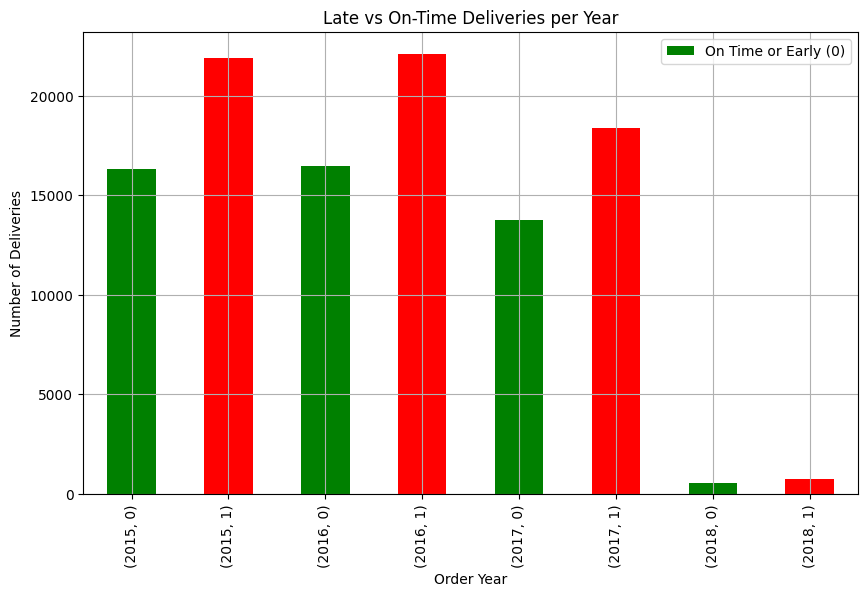

In [ ]:
#Count of Late Arrivals per Year
# Extract year from date
df_cleaned['order_year'] = df_cleaned['order date (DateOrders)'].dt.year

# Group by year and Late Arrival to then count
arrival_status_counts = df_cleaned.groupby(['order_year', 'Late Arrival']).size()

# Graph
arrival_status_counts.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Late vs On-Time Deliveries per Year')
plt.xlabel('Order Year')
plt.ylabel('Number of Deliveries')
plt.legend(['On Time or Early (0)', 'Late (1)'])
plt.grid(True)
plt.show()

##For those years (2015 to 2017) that we have a fill year's data on we can see on biorus trend in this supply chain system which shows that they have more late deliveries a year than ones on time or early.

In [ ]:
#How many orders a year does this company have?
order_counts = df_cleaned.groupby(['order_year']).size()
print(order_counts) #now we know that the significantly lesser number of 2018 orders in what the graph is telling us.

order_year
2015    38258
2016    38573
2017    32166
2018     1305
dtype: int64


In [ ]:
#Encode Categorial Variables before continuing
df_encoded = pd.get_dummies(df_cleaned, columns=['Type', 'Customer City', 'Customer Country', 'Customer State', 'Department Name', 'Order City', 'Order Country',
                                         'Order State', 'Order Status', 'Shipping Mode'], drop_first=True)

In [ ]:
df_encoded.head()

,Sales per customer,Late_delivery_risk,Department Id,Latitude,Longitude,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,...,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
2,309.720001,0,2,37.292233,-121.881279,2018-01-13 12:06:00,18.030001,0.06,327.75,-0.80,...,False,False,False,False,False,False,False,False,False,True
3,304.809998,0,2,34.125946,-118.291016,2018-01-13 11:45:00,22.940001,0.07,327.75,0.08,...,True,False,False,False,False,False,False,False,False,True
5,294.980011,0,2,43.013969,-78.879066,2018-01-13 11:03:00,32.779999,0.10,327.75,0.06,...,False,False,False,False,False,False,False,False,False,True
7,285.140015,1,2,25.928869,-80.162872,2018-01-13 10:21:00,42.610001,0.13,327.75,0.24,...,False,False,False,False,False,True,False,False,False,False
9,275.309998,1,2,37.773991,-121.966629,2018-01-13 09:39:00,52.439999,0.16,327.75,0.48,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Feature Enginering Order and Shipping Date  --
#already created above#df_encoded['order_year'] = df_encoded['order date (DateOrders)'].dt.year
df_encoded['order_month'] = df_encoded['order date (DateOrders)'].dt.month
df_encoded['order_day'] = df_encoded['order date (DateOrders)'].dt.day
df_encoded['order_hour'] = df_encoded['order date (DateOrders)'].dt.hour
df_encoded['order_minute'] = df_encoded['order date (DateOrders)'].dt.minute

df_encoded['shipping_year'] = df_encoded['shipping date (DateOrders)'].dt.year
df_encoded['shipping_month'] = df_encoded['shipping date (DateOrders)'].dt.month
df_encoded['shipping_day'] = df_encoded['shipping date (DateOrders)'].dt.day
df_encoded['shipping_hour'] = df_encoded['shipping date (DateOrders)'].dt.hour
df_encoded['shipping_minute'] = df_encoded['shipping date (DateOrders)'].dt.minute

In [ ]:
#Dropping Order and Shipping Date items that can not go into models
df_encoded = df_encoded.drop(columns=[
    'order date (DateOrders)', 'shipping date (DateOrders)',
    'order_date', 'order_time', 'shipping_date', 'shipping_time'
])

In [ ]:
df_encoded.head()

,Sales per customer,Late_delivery_risk,Department Id,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,...,Shipping Mode_Standard Class,order_month,order_day,order_hour,order_minute,shipping_year,shipping_month,shipping_day,shipping_hour,shipping_minute
2,309.720001,0,2,37.292233,-121.881279,18.030001,0.06,327.75,-0.80,1,...,True,1,13,12,6,2018,1,17,12,6
3,304.809998,0,2,34.125946,-118.291016,22.940001,0.07,327.75,0.08,1,...,True,1,13,11,45,2018,1,16,11,45
5,294.980011,0,2,43.013969,-78.879066,32.779999,0.10,327.75,0.06,1,...,True,1,13,11,3,2018,1,19,11,3
7,285.140015,1,2,25.928869,-80.162872,42.610001,0.13,327.75,0.24,1,...,False,1,13,10,21,2018,1,15,10,21
9,275.309998,1,2,37.773991,-121.966629,52.439999,0.16,327.75,0.48,1,...,False,1,13,9,39,2018,1,15,9,39


#**Spliting Data**

In [ ]:
#HAVE TO REMOVE 'Delay'!!!
  #Since we developed our target variable using this we will need to remove it from our models
df_encoded = df_encoded.drop(columns=['Delay'])
#Remove late_delivery_risk
  #Since it is kind of cheating in our model if we keep this since this is what we are trying to make a model to be able to predict
df_encoded = df_encoded.drop(columns=['Late_delivery_risk'])

In [ ]:
#Random Forest Feature importance
X = df_encoded.drop('Late Arrival', axis=1)
y = df_encoded['Late Arrival']
# Stratified 20% sample of the data
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)

# Split the sampled data into train/test
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

#**Model Training**

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix


Regression Tree Performance:
RMSE: 0.4192475279932837
R-squared: 0.27940346152751494


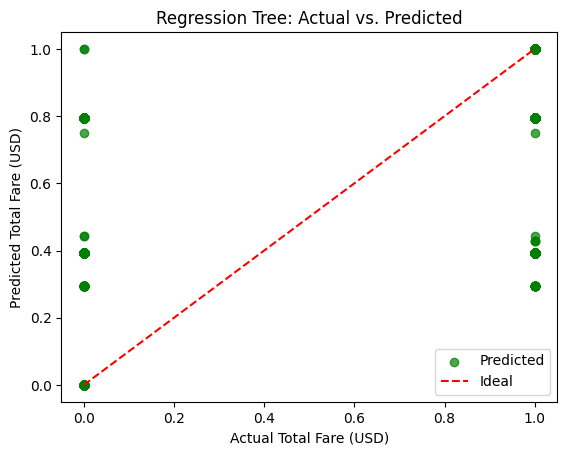

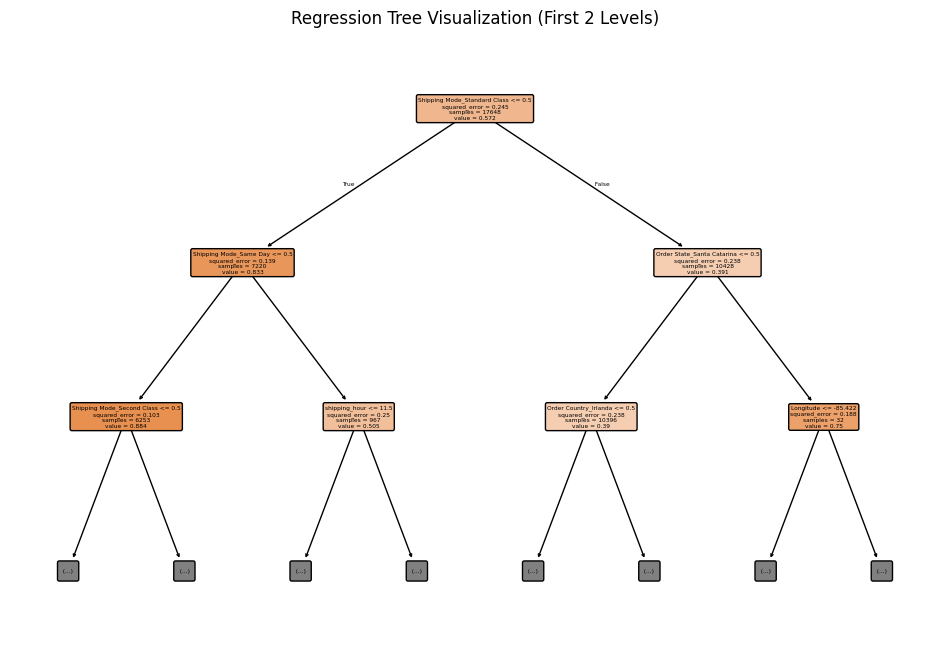

In [ ]:
#CART Model
# Initialize and train a Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predict on test data using the regression tree
y_pred_tree = tree.predict(X_test)

# Calculate evaluation metrics for the tree model: RMSE and R-squared
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("\nRegression Tree Performance:")
print("RMSE:", rmse_tree)
print("R-squared:", r2_tree)

# Plot Actual vs. Predicted for the Regression Tree
plt.figure()
plt.scatter(y_test, y_pred_tree, color='green', alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Total Fare (USD)")
plt.ylabel("Predicted Total Fare (USD)")
plt.title("Regression Tree: Actual vs. Predicted")
plt.legend()
plt.show()

# Visualize the structure of the regression tree (limit to first 2 levels for clarity)
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, max_depth=2)
plt.title("Regression Tree Visualization (First 2 Levels)")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize a scaler and fit on training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test) ##I don't remember if these needs to be moved

In [ ]:
# Check for NaNs
print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())
mask_train = ~np.isnan(X_train_scaled).any(axis=1)
X_train_scaled = X_train_scaled[mask_train]
y_train = y_train[mask_train]

mask_test = ~np.isnan(X_test_scaled).any(axis=1)
X_test_scaled = X_test_scaled[mask_test]
y_test = y_test[mask_test]


NaNs in X_train_scaled: 15258
NaNs in X_test_scaled: 3816


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)


# Train (fit) the classifier on the training data
knn.fit(X_train_scaled, y_train)

# Evaluate on the training set and test set
train_acc = knn.score(X_train_scaled, y_train)
test_acc = knn.score(X_test_scaled, y_test)
print(f"K=5 Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

K=5 Train Accuracy: 0.742, Test Accuracy: 0.599


In [ ]:
#Using cross validation to find the best  value for k to input as a hyperperamiter
from sklearn.model_selection import cross_val_score

# Try K from 1 to 15 and record cross-validation accuracy (using 5-fold CV)
cv_scores = []
neighbors = range(1, 16)
for k in neighbors:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross-validation on training data
    scores = cross_val_score(knn_k, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Print the scores
for k, acc in zip(neighbors, cv_scores):
    print(f"K={k}, Mean CV Accuracy={acc:.3f}")

K=1, Mean CV Accuracy=0.660
K=2, Mean CV Accuracy=0.577
K=3, Mean CV Accuracy=0.587
K=4, Mean CV Accuracy=0.567
K=5, Mean CV Accuracy=0.579
K=6, Mean CV Accuracy=0.556
K=7, Mean CV Accuracy=0.558
K=8, Mean CV Accuracy=0.550
K=9, Mean CV Accuracy=0.556
K=10, Mean CV Accuracy=0.547
K=11, Mean CV Accuracy=0.554
K=12, Mean CV Accuracy=0.533
K=13, Mean CV Accuracy=0.552
K=14, Mean CV Accuracy=0.544
K=15, Mean CV Accuracy=0.546


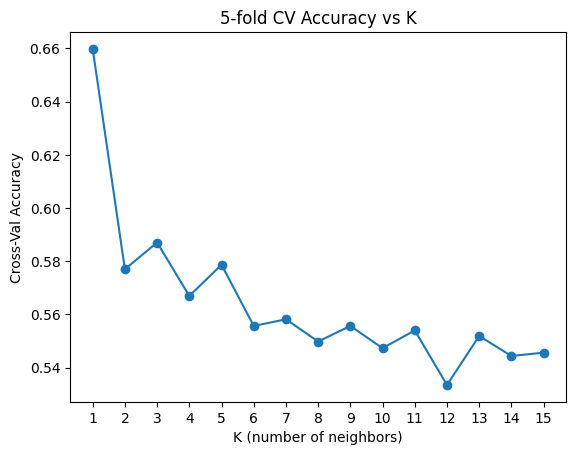

In [ ]:
plt.plot(neighbors, cv_scores, marker='o')
plt.xlabel('K (number of neighbors)')
plt.ylabel('Cross-Val Accuracy')
plt.title('5-fold CV Accuracy vs K')
plt.xticks(range(1,16))
plt.show()

In [ ]:
#Selected the k value we deamed as being best for the dataset
best_k = 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_knn = knn_best.predict(X_test_scaled)
test_acc = knn_best.score(X_test_scaled, y_test)
print(f"Best K = {best_k}, Test Accuracy = {test_acc:.3f}")

Best K = 1, Test Accuracy = 0.708


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm)

# Classification report (precision, recall, f1)
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=["Fail", "Pass"]))#DO WE NEED THIS

Confusion Matrix:
 [[170  80]
 [ 94 252]]
Classification Report:
               precision    recall  f1-score   support

        Fail       0.64      0.68      0.66       250
        Pass       0.76      0.73      0.74       346

    accuracy                           0.71       596
   macro avg       0.70      0.70      0.70       596
weighted avg       0.71      0.71      0.71       596



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
# Initialize and train the logistic regression model

# Check for NaNs
print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())
mask_train = ~np.isnan(X_train_scaled).any(axis=1)
X_train_scaled = X_train_scaled[mask_train]
y_train = y_train[mask_train]

mask_test = ~np.isnan(X_test_scaled).any(axis=1)
X_test_scaled = X_test_scaled[mask_test]
y_test = y_test[mask_test]
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

NaNs in X_train_scaled: 0
NaNs in X_test_scaled: 0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

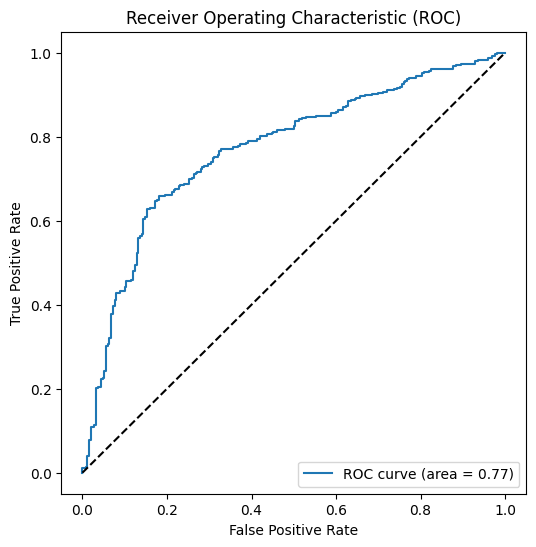

In [ ]:
# Get predicted probabilities for the positive class
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# Train sklearn AdaBoost
ada = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=1),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
ada.fit(X_train_scaled, y_train)

y_pred_ada = ada.predict(X_test_scaled)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada  = r2_score(y_test, y_pred_ada)

print(f"AdaBoost → RMSE: {np.sqrt(mse_ada):.3f},  R²: {r2_ada:.3f}")

AdaBoost → RMSE: 0.445,  R²: 0.186


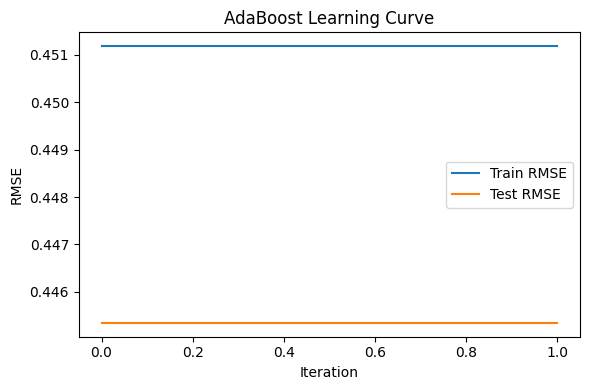

In [ ]:
# Plot train/test error per iteration
train_err, test_err = [], []
for y_train_pred in ada.staged_predict(X_train_scaled):
    train_err.append(mean_squared_error(y_train, y_train_pred))
for y_test_pred in ada.staged_predict(X_test_scaled):
    test_err .append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(6,4))
plt.plot(np.sqrt(train_err), label="Train RMSE")
plt.plot(np.sqrt(test_err),  label="Test RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.title("AdaBoost Learning Curve")
plt.tight_layout()
plt.show()

(596,)
(596,)
RandomForest Accuracy: 0.743
(596,)
(596,)
GradientBoosting Accuracy: 0.730
(596,)
(596,)
Logistic Regression Accuracy: 0.718
(596,)
(596,)
KNN Accuracy: 0.599
(596,)
(596,)
AdaBoost Accuracy: 0.723
(596,)
(596,)
CART Accuracy: 0.824


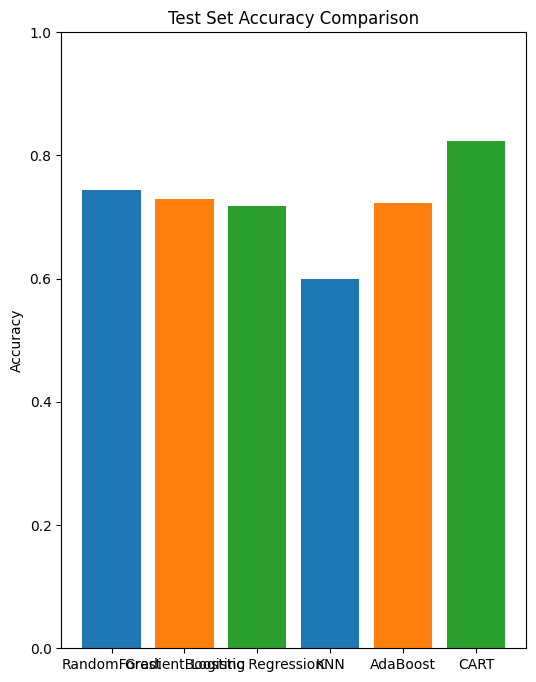

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(
        #base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100, learning_rate=0.5, random_state=42
    ),
    'CART': DecisionTreeClassifier(random_state=42)
}
results = {}
for name, mdl in models.items():
    mdl.fit(X_train_scaled, y_train)
    y_pred = mdl.predict(X_test_scaled)
    print(y_pred.shape)
    print(y_test.shape)
    acc = accuracy_score(np.array(y_test), np.array(y_pred))
    results[name] = acc
    print(f"{name} Accuracy: {acc:.3f}")
plt.figure(figsize=(6,8))
plt.bar(results.keys(), results.values(), color=['C0','C1','C2'][:len(results)])
plt.ylim(0,1)
plt.title("Test Set Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
for name, mdl in models.items():
    preds = mdl.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    results[name] = acc


RandomForest Accuracy: 0.7433
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       250
           1       0.77      0.79      0.78       346

    accuracy                           0.74       596
   macro avg       0.74      0.73      0.73       596
weighted avg       0.74      0.74      0.74       596

Confusion Matrix:
 [[168  82]
 [ 71 275]]

GradientBoosting Accuracy: 0.7299
              precision    recall  f1-score   support

           0       0.63      0.88      0.73       250
           1       0.88      0.62      0.73       346

    accuracy                           0.73       596
   macro avg       0.75      0.75      0.73       596
weighted avg       0.77      0.73      0.73       596

Confusion Matrix:
 [[221  29]
 [132 214]]

Logistic Regression Accuracy: 0.7181
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       250
           1       0.77      0.73      0.75      

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [ ]:
# 1. Random Forest
param_grid_rf = {
    'n_estimators': [25, 35, 50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5], ##
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                     param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [25, 35, 50]},
             scoring='accuracy')

In [ ]:
# 2. Gradient Boosting
param_grid_gb = {
    'n_estimators': [25, 30, 35], #I added 50
    'learning_rate': [0.05, 0.1]
    #'max_depth': [3, 5],
    #'min_samples_split': [2, 5], ##
    #'min_samples_leaf': [1, 2],
}
gs_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                     param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
gs_gb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [25, 30, 35]},
             scoring='accuracy')

In [ ]:
''' #Could not run this, it took forever event with editing items
#3. XGBoosting
param_grid_xgb = {
    'n_estimators': [25, 30],
    'learning_rate': [0.05, 0.1]
}
gs_xgb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                     param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
gs_xgb.fit(X_train_scaled, y_train)
'''

In [ ]:
# 4. K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7], #looking at cross valuation above, 7 seemed to be the better k than 10
    'weights': ['uniform', 'distance']
}
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
gs_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# 5. Logistic Regression
param_grid_logr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
gs_logr = GridSearchCV(LogisticRegression(max_iter=1000),
                       param_grid_logr, cv=5, scoring='accuracy', n_jobs=-1)
gs_logr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [ ]:
# 6. CART (Decision Tree)
param_grid_cart = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], ##
    'criterion': ['gini', 'entropy'],
}
gs_cart = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid_cart, cv=5, scoring='accuracy', n_jobs=-1)
gs_cart.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

RF_tuned Accuracy: 0.8238
              precision    recall  f1-score   support

           0       0.82      0.22      0.34       250
           1       0.63      0.97      0.76       346

    accuracy                           0.65       596
   macro avg       0.72      0.59      0.55       596
weighted avg       0.71      0.65      0.59       596

Confusion Matrix:
 [[ 54 196]
 [ 12 334]]

GB_tuned Accuracy: 0.8238
              precision    recall  f1-score   support

           0       0.62      0.89      0.73       250
           1       0.89      0.60      0.72       346

    accuracy                           0.72       596
   macro avg       0.75      0.75      0.72       596
weighted avg       0.77      0.72      0.72       596

Confusion Matrix:
 [[223  27]
 [138 208]]

KNN_tuned Accuracy: 0.8238
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       250
           1       0.73      0.73      0.73       346

    accuracy     

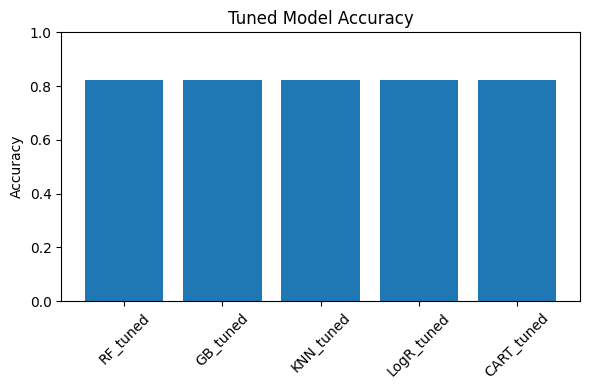

In [ ]:
#EVALUATING BEST MODELS
# Collect best estimators
best_rf = gs_rf.best_estimator_
best_gb = gs_gb.best_estimator_
best_knn = gs_knn.best_estimator_
best_logr = gs_logr.best_estimator_
best_cart = gs_cart.best_estimator_

# Add all tuned models
models_tuned = {
    'RF_tuned': best_rf,
    'GB_tuned': best_gb,
    'KNN_tuned': best_knn,
    'LogR_tuned': best_logr,
    'CART_tuned': best_cart
}

# Evaluate on test set
tuned_results = {}
for name, mdl in models_tuned.items():
    X_eval = X_test_scaled if 'KNN' in name or 'LogR' in name else X_test
    preds = mdl.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print()
    tuned_results[name] = acc

# Bar chart of tuned model accuracy
plt.figure(figsize=(6, 4))
plt.bar(tuned_results.keys(), tuned_results.values())
plt.ylim(0, 1)
plt.title("Tuned Model Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

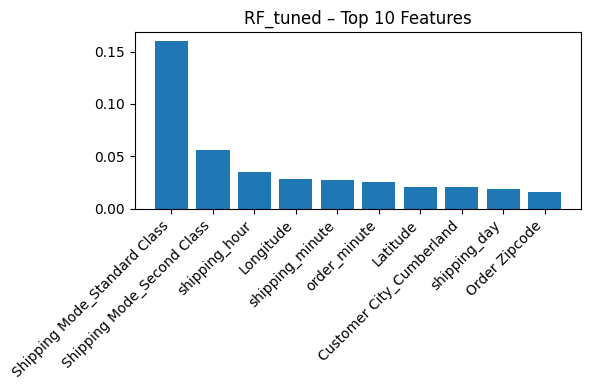

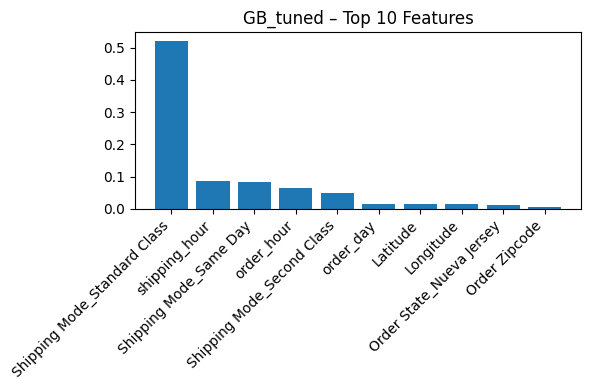

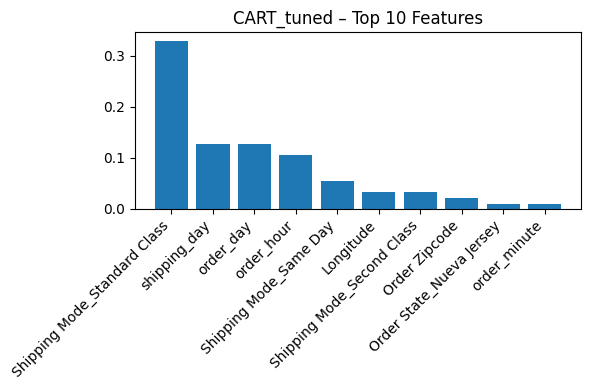

In [ ]:
#Visualizing the top 10 most important features produced by best random forest and GradientBoosting Models

# All models with feature importance ranking capabilities
models_tuned_fi = {
    'RF_tuned': best_rf,
    'GB_tuned': best_gb,
    #'KNN_tuned': best_knn, #Does not have feature importance ability
    #'LogR_tuned': best_logr, #Does not have feature importance ability
    'CART_tuned': best_cart
}
for name, mdl in models_tuned_fi.items():
    imp = mdl.feature_importances_
    idx = np.argsort(imp)[::-1][:10]
    top_feats = X_train.columns[idx]

    plt.figure(figsize=(6,4))
    plt.title(f"{name} – Top 10 Features")
    plt.bar(range(len(idx)), imp[idx])
    plt.xticks(range(len(idx)), top_feats, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
df_encoded.head()

,Sales per customer,Department Id,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,...,Shipping Mode_Standard Class,order_month,order_day,order_hour,order_minute,shipping_year,shipping_month,shipping_day,shipping_hour,shipping_minute
2,309.720001,2,37.292233,-121.881279,18.030001,0.06,327.75,-0.80,1,327.75,...,True,1,13,12,6,2018,1,17,12,6
3,304.809998,2,34.125946,-118.291016,22.940001,0.07,327.75,0.08,1,327.75,...,True,1,13,11,45,2018,1,16,11,45
5,294.980011,2,43.013969,-78.879066,32.779999,0.10,327.75,0.06,1,327.75,...,True,1,13,11,3,2018,1,19,11,3
7,285.140015,2,25.928869,-80.162872,42.610001,0.13,327.75,0.24,1,327.75,...,False,1,13,10,21,2018,1,15,10,21
9,275.309998,2,37.773991,-121.966629,52.439999,0.16,327.75,0.48,1,327.75,...,False,1,13,9,39,2018,1,15,9,39


In [ ]:
# Visualize the structure of the regression tree (limit to first 2 levels for clarity)
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, max_depth=2)
plt.title("Regression Tree Visualization (First 2 Levels)")
plt.show()

In [ ]:
#Creating a Normal Test and Train split using all the original data
X = df_encoded.drop('Late Arrival', axis=1)
y = df_encoded['Late Arrival']

# Split the sampled data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Running best model (CART) data on non-scaled data
#Tried Running but it crashes
'''
best_CART_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42) #Could not run cause it crashes
best_CART_model.fit(X_train, y_train)
'''

'\nbest_CART_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42) #Could not run cause it crashes\nbest_CART_model.fit(X_train, y_train)\n'